# Team no. 9



# 4th sem  A division

# Computer science department

# Project Title: Analysis on OTT Platforms

# Problem Statement:  How did COVID-19 had an impact on the growth and popularity  of OTT platforms in the lockdown period.

In [58]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Loading of all datasets

In [59]:
#Loading of netflix dataset
netflix_df=pd.read_csv('netflix_titles.csv')

In [60]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,OTT
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Netflix
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Netflix
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Netflix
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Netflix
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Netflix


In [61]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  OTT           8807 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB


In [62]:
#NO.of null values in netflix dataset
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
OTT                0
dtype: int64

All the null values are removed.

In [63]:
#loading of prime dataset
prime_df=pd.read_csv('amazon_prime_titles.csv')

In [64]:
prime_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,OTT
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,30-Mar-21,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,Amazon prime
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,Amazon prime
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,30-Mar-21,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,Amazon prime
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,30-Mar-21,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",Amazon prime
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,30-Mar-21,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,Amazon prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...,Amazon prime
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve...",Amazon prime
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou...",Amazon prime
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ...",Amazon prime


In [65]:
prime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
 12  OTT           9668 non-null   object
dtypes: int64(1), object(12)
memory usage: 982.0+ KB


In [66]:
#NO.of null values in prime dataset
prime_df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
OTT                0
dtype: int64

In [67]:
#loading of disney+ dataset
disney_df=pd.read_csv('disney_plus_titles.csv')

In [68]:
disney_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,OTT
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,Disney
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,Disney
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,Disney
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",Disney
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,25-Nov-21,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,Disney
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",4-Jun-21,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,Disney
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2-Apr-21,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,Disney
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",18-Dec-20,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",Disney
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",18-Sep-20,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,Disney


In [69]:
disney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
 12  OTT           1450 non-null   object
dtypes: int64(1), object(12)
memory usage: 147.4+ KB


In [70]:
#NO.of null values in disney+ dataset
disney_df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
OTT               0
dtype: int64

In [71]:
#loading of hulu dataset
hulu_df=pd.read_csv('hulu_titles.csv')

In [72]:
hulu_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,OTT
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,24-Oct-21,2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...,Hulu
1,s2,Movie,Silent Night,NaN,NaN,NaN,23-Oct-21,2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r...",Hulu
2,s3,Movie,The Marksman,NaN,NaN,NaN,23-Oct-21,2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...,Hulu
3,s4,Movie,Gaia,NaN,NaN,NaN,22-Oct-21,2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...,Hulu
4,s5,Movie,Settlers,NaN,NaN,NaN,22-Oct-21,2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...,Hulu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,NaN,NaN,United States,NaN,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...,Hulu
3069,s3070,TV Show,Star Trek: Voyager,NaN,NaN,United States,NaN,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...,Hulu
3070,s3071,TV Show,The Fades,NaN,NaN,United Kingdom,NaN,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...,Hulu
3071,s3072,TV Show,The Twilight Zone,NaN,NaN,United States,NaN,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...,Hulu


In [73]:
hulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3073 non-null   object 
 1   type          3073 non-null   object 
 2   title         3073 non-null   object 
 3   director      3 non-null      object 
 4   cast          0 non-null      float64
 5   country       1620 non-null   object 
 6   date_added    3045 non-null   object 
 7   release_year  3073 non-null   int64  
 8   rating        2553 non-null   object 
 9   duration      2594 non-null   object 
 10  listed_in     3073 non-null   object 
 11  description   3069 non-null   object 
 12  OTT           3073 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 312.2+ KB


In [74]:
#NO.of null values in hulu dataset
hulu_df.isnull().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
OTT                0
dtype: int64

In [75]:
#loading of revenue dataset
revenue=pd.read_csv('DataNetflixRevenue2020_V2.csv')
revenue

,Area,Years,Revenue
0,United States and Canada,Q1 - 2018,1976157000
1,"Europe, Middle East and Africa",Q1 - 2018,886649000
2,Latin America,Q1 - 2018,540182000
3,Asia-Pacific,Q1 - 2018,199117000
4,United States and Canada,Q2 - 2018,2049546000
5,"Europe, Middle East and Africa",Q2 - 2018,975497000
6,Latin America,Q2 - 2018,568071000
7,Asia-Pacific,Q2 - 2018,221252000
8,United States and Canada,Q3 - 2018,2094850000
9,"Europe, Middle East and Africa",Q3 - 2018,1004749000


In [76]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Area     40 non-null     object
 1   Years    40 non-null     object
 2   Revenue  40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [77]:
revenue.describe()

,Revenue
count,4.000000e+01
mean,1.176952e+09
std,8.246170e+08
min,1.991170e+08
25%,5.567758e+08
50%,8.400510e+08
75%,1.913442e+09
max,2.839670e+09


In [78]:
#loading of movies dataset
movies=pd.read_csv('MoviesOnStreamingPlatforms.csv')

In [79]:
movies

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [80]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


In [81]:
#NO.of null values in movies dataset
movies.isnull().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [82]:
#loading of Tv shows dataset
tv=pd.read_csv('tv_shows.csv')

In [83]:
tv

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1


In [84]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


In [85]:
#NO.of null values in tv shows dataset
tv.isnull().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

# Data Pre-processing

In [86]:
#deleting the columns to remove the null values
netflix_df.drop(['show_id','director','cast','duration','description','rating','date_added','country'], axis=1, inplace=True)

In [87]:
netflix_df.isnull().sum()

type            0
title           0
release_year    0
listed_in       0
OTT             0
dtype: int64

In [88]:
#deleting the columns to remove the null values
prime_df.drop(['show_id','director','cast','rating','duration','description','date_added','country'], axis=1, inplace=True)

In [89]:
prime_df.isnull().sum()

type            0
title           0
release_year    0
listed_in       0
OTT             0
dtype: int64

In [90]:
#deleting the columns to remove the null values
disney_df.drop(['show_id','director','cast','date_added','rating','duration','description','country'], axis=1, inplace=True)

In [91]:
disney_df.isnull().sum()

type            0
title           0
release_year    0
listed_in       0
OTT             0
dtype: int64

In [92]:
#deleting the columns to remove the null values
hulu_df.drop(['show_id','director','cast','date_added','rating','duration','description','country'], axis=1, inplace=True)

In [93]:
hulu_df.isnull().sum()

type            0
title           0
release_year    0
listed_in       0
OTT             0
dtype: int64

In [94]:
#deleting the columns to remove the null values
movies.drop(['Unnamed: 0','ID'], axis=1, inplace=True)

In [95]:
#replacing the null values by mode of the given attribute
movies['Rotten Tomatoes'] = movies['Rotten Tomatoes'].str[0:2]
revenue['Years'] = revenue['Years'].str[4:]
replace = movies['Rotten Tomatoes'].fillna(movies['Rotten Tomatoes'].mode()[0], inplace=True) 
replace = movies['Age'].fillna(movies['Age'].mode()[0], inplace=True) 

In [96]:
#Creating new attribute called 'IMDb'
movies['Rotten Tomatoes'] = movies['Rotten Tomatoes'].astype('int64')
movies['IMDb']=movies['Rotten Tomatoes']/10

In [97]:
movies.isnull().sum()

Title              0
Year               0
Age                0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
IMDb               0
dtype: int64

In [98]:
#deleting the columns to remove the null values
tv.drop(['Unnamed: 0','ID'], axis=1, inplace=True)

In [99]:
#replacing the null values by mode of the given attribute
tv['Rotten Tomatoes'] = tv['Rotten Tomatoes'].str[0:2]
tv['IMDb'] = tv['IMDb'].str[0:3]
replace = tv['Age'].fillna(tv['Age'].mode()[0], inplace=True) 

In [100]:
#replacing the null values
tv['Rotten Tomatoes'] = tv['Rotten Tomatoes'].astype('int64')
tv['IMDb'] = tv['IMDb'].astype('float64')
replace = tv['IMDb'].fillna(tv['Rotten Tomatoes']/10,inplace=True)

In [101]:
tv.isnull().sum()

Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
dtype: int64

All the null values are removed.

# Data Integration

In [102]:
netflix_df.to_csv('./datasets1/New_netflix_titles.csv', index=False)
prime_df.to_csv('./datasets1/New_prime_titles.csv', index=False)
disney_df.to_csv('./datasets1/New_disney_titles.csv', index=False)
hulu_df.to_csv('./datasets1/New_hulu_titles.csv', index=False)

In [103]:
netflix_clean=pd.read_csv('./datasets1/New_netflix_titles.csv')
prime_clean=pd.read_csv('./datasets1/New_prime_titles.csv')
disney_clean=pd.read_csv('./datasets1/New_disney_titles.csv')
hulu_clean=pd.read_csv('./datasets1/New_hulu_titles.csv')

In [104]:
movies.to_csv('./datasets/New_MoviesOnStreamingPlatforms.csv', index=False)
tv.to_csv('./datasets/New_tv_shows.csv', index=False)

In [105]:
import os

In [106]:
filenames = [file for file in os.listdir('./datasets')]
print(*filenames, sep='\n')

New_MoviesOnStreamingPlatforms.csv
New_tv_shows.csv


In [107]:
#Data Integration
all_data = pd.DataFrame()
for file in filenames:
    df = pd.read_csv('./datasets/'+file)
    all_data = pd.concat([all_data, df])

all_data.reset_index(drop=True, inplace=True)
all_data

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,IMDb
0,The Irishman,2019,18+,98,1,0,0,0,0,9.8
1,Dangal,2016,7+,97,1,0,0,0,0,9.7
2,David Attenborough: A Life on Our Planet,2020,7+,95,1,0,0,0,0,9.5
3,Lagaan: Once Upon a Time in India,2001,7+,94,1,0,0,0,0,9.4
4,Roma,2018,18+,94,1,0,0,0,0,9.4
...,...,...,...,...,...,...,...,...,...,...
14878,Paradise Islands,2017,16+,10,0,0,0,1,1,1.0
14879,Mexico Untamed,2018,16+,10,0,0,0,1,1,1.0
14880,Wild Centeral America,2020,16+,10,0,0,0,1,1,1.0
14881,Wild Russia,2018,16+,10,0,0,0,1,1,1.0


In [108]:
all_data['Type']=all_data['Type'].astype(object)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14883 entries, 0 to 14882
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            14883 non-null  object 
 1   Year             14883 non-null  int64  
 2   Age              14883 non-null  object 
 3   Rotten Tomatoes  14883 non-null  int64  
 4   Netflix          14883 non-null  int64  
 5   Hulu             14883 non-null  int64  
 6   Prime Video      14883 non-null  int64  
 7   Disney+          14883 non-null  int64  
 8   Type             14883 non-null  object 
 9   IMDb             14883 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 1.1+ MB


In [109]:
import os
filenames = [file for file in os.listdir('./datasets1')]
print(*filenames, sep='\n')

New_disney_titles.csv
New_hulu_titles.csv
New_netflix_titles.csv
New_prime_titles.csv


In [110]:
#Data Integration
all_data1 = pd.DataFrame()
for file in filenames:
    df = pd.read_csv('./datasets1/'+file)
    all_data1 = pd.concat([all_data1, df])

all_data1.reset_index(drop=True, inplace=True)
all_data1

,type,title,release_year,listed_in,OTT
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,2016,"Animation, Family",Disney
1,Movie,Ernest Saves Christmas,1988,Comedy,Disney
2,Movie,Ice Age: A Mammoth Christmas,2011,"Animation, Comedy, Family",Disney
3,Movie,The Queen Family Singalong,2021,Musical,Disney
4,TV Show,The Beatles: Get Back,2021,"Docuseries, Historical, Music",Disney
...,...,...,...,...,...
22993,Movie,Pride Of The Bowery,1940,Comedy,Amazon prime
22994,TV Show,Planet Patrol,2018,TV Shows,Amazon prime
22995,Movie,Outpost,2008,Action,Amazon prime
22996,TV Show,Maradona: Blessed Dream,2021,"Drama, Sports",Amazon prime


In [111]:
all_data['Type']=all_data['Type'].replace({0:'Movies'})
all_data['Type']=all_data['Type'].replace({1:'Tv shows'})
all_data['Genre']=all_data1['listed_in']
all_data.head(10)

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,IMDb,Genre
0,The Irishman,2019,18+,98,1,0,0,0,Movies,9.8,"Animation, Family"
1,Dangal,2016,7+,97,1,0,0,0,Movies,9.7,Comedy
2,David Attenborough: A Life on Our Planet,2020,7+,95,1,0,0,0,Movies,9.5,"Animation, Comedy, Family"
3,Lagaan: Once Upon a Time in India,2001,7+,94,1,0,0,0,Movies,9.4,Musical
4,Roma,2018,18+,94,1,0,0,0,Movies,9.4,"Docuseries, Historical, Music"
5,To All the Boys I've Loved Before,2018,13+,94,1,0,0,0,Movies,9.4,"Biographical, Documentary"
6,The Social Dilemma,2020,13+,93,1,0,0,0,Movies,9.3,"Action-Adventure, Superhero"
7,Okja,2017,13+,92,1,0,0,0,Movies,9.2,"Docuseries, Reality, Survival"
8,The Ballad of Buster Scruggs,2018,16+,92,1,0,0,0,Movies,9.2,"Animals & Nature, Docuseries, Family"
9,The Trial of the Chicago 7,2020,18+,92,1,0,0,0,Movies,9.2,"Comedy, Family, Musical"


In [112]:
all_data['Netflix']=all_data['Netflix'].replace({1:'Netflix'})
all_data['Netflix']=all_data['Netflix'].replace({0:' '})
all_data['Hulu']=all_data['Hulu'].replace({1:'Hulu'})
all_data['Hulu']=all_data['Hulu'].replace({0:' '})
all_data['Prime Video']=all_data['Prime Video'].replace({1:'Prime Video'})
all_data['Prime Video']=all_data['Prime Video'].replace({0:' '})
all_data['Disney+']=all_data['Disney+'].replace({1:'Disney+'})
all_data['Disney+']=all_data['Disney+'].replace({0:' '})
all_data['ott']=all_data['Netflix'] + all_data['Hulu']  +all_data['Prime Video'] + all_data['Disney+'] 
all_data.drop(['Netflix','Prime Video','Hulu','Disney+'],axis=1, inplace=True)
all_data


,Title,Year,Age,Rotten Tomatoes,Type,IMDb,Genre,ott
0,The Irishman,2019,18+,98,Movies,9.8,"Animation, Family",Netflix
1,Dangal,2016,7+,97,Movies,9.7,Comedy,Netflix
2,David Attenborough: A Life on Our Planet,2020,7+,95,Movies,9.5,"Animation, Comedy, Family",Netflix
3,Lagaan: Once Upon a Time in India,2001,7+,94,Movies,9.4,Musical,Netflix
4,Roma,2018,18+,94,Movies,9.4,"Docuseries, Historical, Music",Netflix
...,...,...,...,...,...,...,...,...
14878,Paradise Islands,2017,16+,10,Tv shows,1.0,Kids,Disney+
14879,Mexico Untamed,2018,16+,10,Tv shows,1.0,Special Interest,Disney+
14880,Wild Centeral America,2020,16+,10,Tv shows,1.0,"Documentary, Special Interest, Unscripted",Disney+
14881,Wild Russia,2018,16+,10,Tv shows,1.0,"Documentary, Special Interest",Disney+


# 1. Growth of OTT platforms year wise.

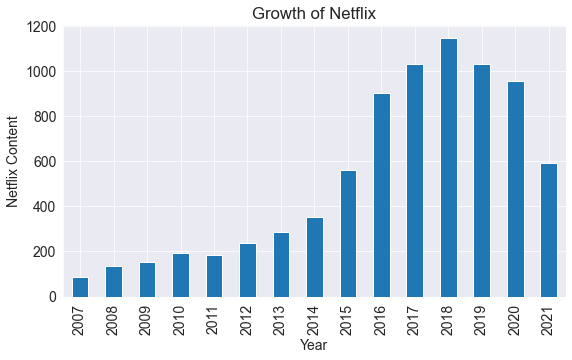

In [113]:
netflix_clean.release_year.value_counts().sort_index(ascending = True).tail(15).plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Netflix Content')
plt.title('Growth of Netflix');

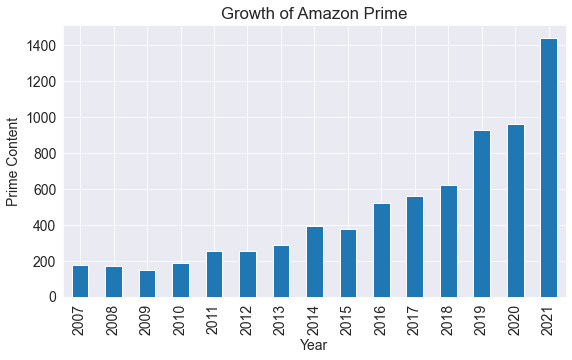

In [114]:
prime_clean.release_year.value_counts().sort_index(ascending = True).tail(15).plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Prime Content')
plt.title('Growth of Amazon Prime');

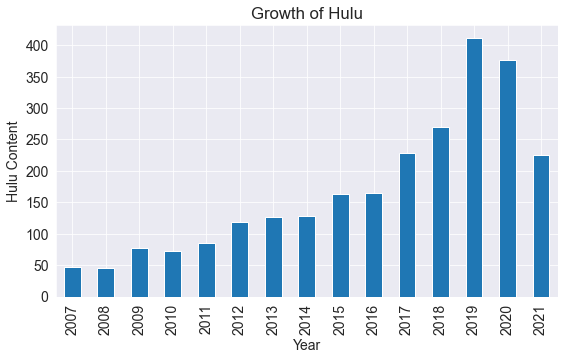

In [115]:
hulu_clean.release_year.value_counts().sort_index(ascending = True).tail(15).plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Hulu Content')
plt.title('Growth of Hulu');

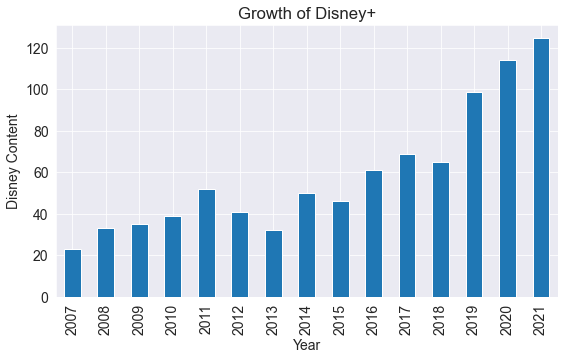

In [116]:
disney_clean.release_year.value_counts().sort_index(ascending = True).tail(15).plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Disney Content')
plt.title('Growth of Disney+');

# 2. Revenue of Netflix over the years

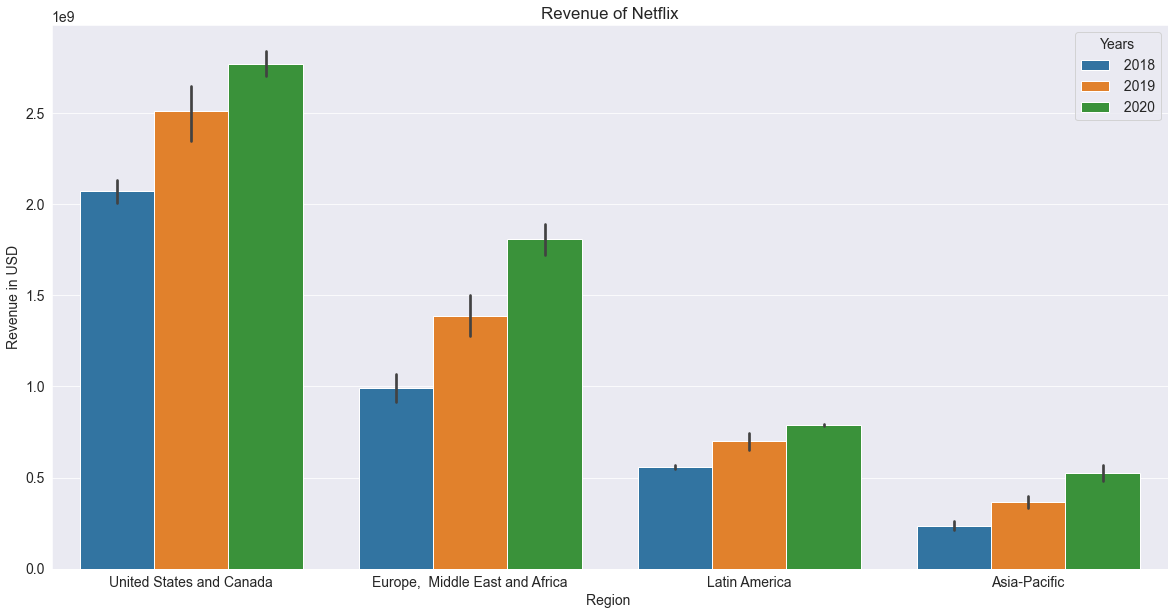

In [117]:
plt.figure(figsize=(20,10))
sns.barplot(x='Area',y='Revenue',data=revenue,hue='Years')
plt.xlabel('Region ')
plt.ylabel('Revenue in USD')
plt.title('Revenue of Netflix');

# 3. The impact of COVID-19 on IMDb ratings

c:\Users\YAJAS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\YAJAS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


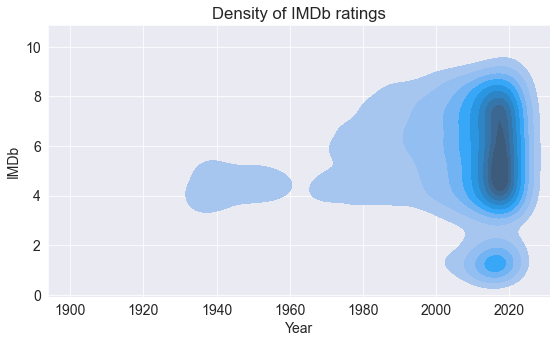

In [118]:
sns.kdeplot(all_data.Year, all_data.IMDb, shade=True, shade_lowest=False)
plt.title('Density of IMDb ratings');

# 4.  The no. of content produced by OTT platforms in the year 2020 and 2021

In [119]:
df=all_data1[all_data1['release_year']==2020]
df

,type,title,release_year,listed_in,OTT
10,Movie,Adventure Thru the Walt Disney Archives,2020,Documentary,Disney
11,Movie,Puppy for Hanukkah,2020,"Comedy, Family, Music",Disney
64,TV Show,Secrets Of The Zoo: Down Under,2020,"Animals & Nature, Docuseries, Family",Disney
65,TV Show,Secrets of the Zoo: North Carolina,2020,Reality,Disney
67,TV Show,Zombies: Addison's Moonstone Mystery,2020,"Animation, Coming of Age, Fantasy",Disney
...,...,...,...,...,...
22858,Movie,THE CHRISTMAS EDITION,2020,Drama,Amazon prime
22885,Movie,DEAR CHRISTMAS,2020,Drama,Amazon prime
22907,Movie,Surviving America,2020,"Documentary, Special Interest",Amazon prime
22911,TV Show,Spoopy Movie Time,2020,"Comedy, Horror",Amazon prime


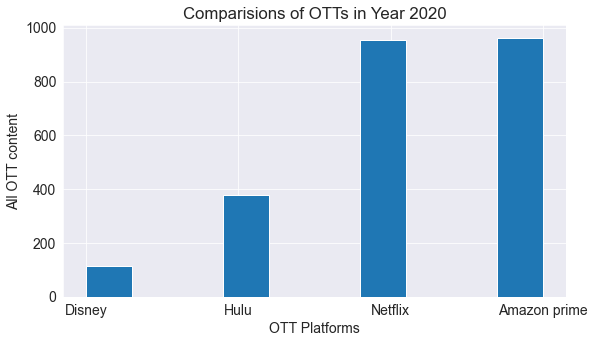

In [120]:
plt.hist(x='OTT', data=df)
plt.title('Comparisions of OTTs in Year 2020')
plt.xlabel('OTT Platforms')
plt.ylabel('All OTT content');

In [121]:
df1=all_data1[all_data1['release_year']==2021]
df1

,type,title,release_year,listed_in,OTT
3,Movie,The Queen Family Singalong,2021,Musical,Disney
4,TV Show,The Beatles: Get Back,2021,"Docuseries, Historical, Music",Disney
5,Movie,Becoming Cousteau,2021,"Biographical, Documentary",Disney
6,TV Show,Hawkeye,2021,"Action-Adventure, Superhero",Disney
14,Movie,America the Beautiful,2021,Animals & Nature,Disney
...,...,...,...,...,...
22985,TV Show,DaFUNdamentals Series,2021,"Animation, Kids",Amazon prime
22986,Movie,Anaganaga Oka Nenu,2021,"Action, Drama, Suspense",Amazon prime
22990,Movie,The Man in the Hat,2021,Comedy,Amazon prime
22992,Movie,River,2021,"Drama, Science Fiction, Suspense",Amazon prime


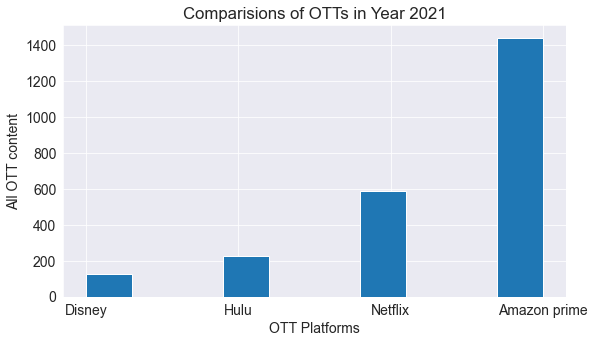

In [122]:
plt.hist(x='OTT', data=df1)
plt.title('Comparisions of OTTs in Year 2021')
plt.xlabel('OTT Platforms')
plt.ylabel('All OTT content');

# 5. Type of Content that are added by Netflix in the year 2020.

In [123]:
df0=pd.read_csv('netflix_titles.csv')

In [124]:
df0.drop(['show_id','director','cast','duration','description','date_added','country'], axis=1, inplace=True)

In [125]:
df0.dropna(inplace=True)

In [126]:
df0

,type,title,release_year,rating,listed_in,OTT
0,Movie,Dick Johnson Is Dead,2020,PG-13,Documentaries,Netflix
1,TV Show,Blood & Water,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",Netflix
2,TV Show,Ganglands,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",Netflix
3,TV Show,Jailbirds New Orleans,2021,TV-MA,"Docuseries, Reality TV",Netflix
4,TV Show,Kota Factory,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",Netflix
...,...,...,...,...,...,...
8802,Movie,Zodiac,2007,R,"Cult Movies, Dramas, Thrillers",Netflix
8803,TV Show,Zombie Dumb,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies",Netflix
8804,Movie,Zombieland,2009,R,"Comedies, Horror Movies",Netflix
8805,Movie,Zoom,2006,PG,"Children & Family Movies, Comedies",Netflix


In [127]:
df_1=df0[df0['release_year']==2020]

In [128]:
df_1['rating'].value_counts()

TV-MA    469
TV-14    174
TV-PG     80
TV-Y      59
R         48
TV-G      45
TV-Y7     41
PG-13     21
PG        15
G          1
Name: rating, dtype: int64

# 5. What type of Content is added by Netflix in the year 2020?

c:\Users\YAJAS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Content added by Netflix in year 2020')

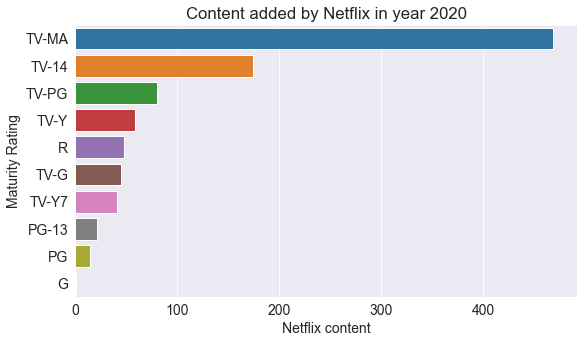

In [129]:
sns.barplot(df_1['rating'].value_counts(),df_1['rating'].value_counts().index )
plt.xlabel('Netflix content')
plt.ylabel('Maturity Rating')
plt.title('Content added by Netflix in year 2020')